# Digit Recognizer with ANN

**First we import all the necessary libraries i.e. Tensorflow and Keras**

In [121]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

Now after importing libraries, we need to load the dataset. Here we are performing analysis on MNIST dataset in keras datasets, so we load that dataset and split into training and testing.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

The Size of dataset is quite large in which for training set we have 60000 images and for testing we have 10000 images.

**Here (28, 28) is the pixel size of the images i.e. each image contains 28 * 28 pixels**

original output is 2


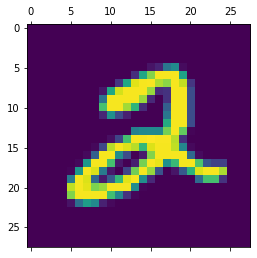

In [9]:
plt.matshow(x_train[5])
print('original output is',y_train[5])

Matplotlib provides the function called matshow to plot the pixels in the image format.

In [75]:
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

**The flatten layer requires in training the ANN in input layer, henceforth we reshape both train and test dataset as 28 * 28 = 784. so we will train ANN with 784 input neurons.**

In [76]:
x_test_flatten.shape

(10000, 784)

In [71]:
x_train = x_train/255
X_test = x_test/255

we divied train and test datasets by the highest pixel value i.e. 255 as we need to scale dataset between 0 to 1. This is same as scaling in Machine learning. 

In [72]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(100, activation = 'tanh'),
        keras.layers.Dense(50, activation = 'tanh'),
        keras.layers.Dense(10, activation = 'sigmoid')
])

1) Here we build our ANN model, sequential is for we need sequential layers in our ANN.

2) First layer is flatten with 784 input neuron(this we can do directly in model or before model as we done before) 

3) Then we added first hidden layer with 100 neurons having **Tanh** as activation function.

4) We added second hidden layer for better accuracy with 50 neurons and **Tanh** activation function.

5) After that the last output layer contains 10 neurons as we have 0 to 9 digits with **Sigmoid** activation function.

In [73]:
model.compile(optimizer = 'RMSprop', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

Here we compiled our model with *RMSprop* as optimizer, *sparse_categorical_crossentropy* as loss and *accuracy* as metrics to evaluate our model score.

In [74]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3217 - accuracy: 0.9200
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1304 - accuracy: 0.9621
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0948 - accuracy: 0.9720
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0743 - accuracy: 0.9778
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0617 - accuracy: 0.9809
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0523 - accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0452 - accuracy: 0.9866
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0389 - accuracy: 0.9885
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0339 - accuracy: 0.9901
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.029

With the help of 10 epochs, we get the best accuracy which is 99.16% on our training dataset. Now we will eveluate the main part i.e. model score on test dataset throgh which we can conclude that our model is best fitted or overfitted.

In [83]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 0s 846us/step - loss: 0.1280 - accuracy: 0.9655


[0.12797950208187103, 0.965499997138977]

***By seeing the accuracy i.e. 96.54% we can blindly say that our model is best trained to classify the digits.***

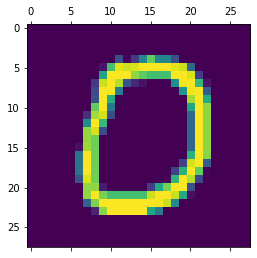

In [91]:
plt.matshow(x_test[10])

In [88]:
predicted_test = model.predict(x_test_flatten)

In [92]:
np.argmax(predicted_test[10])

0

The argmax argument is used to find the maximum value out of all the values present. So predicted output of the 10th observation is 0 and this is correctly predicted as we have plotted the 10th observation above.

In [95]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

So here we print first five original obervations from test dataset and now crosscheck with our predicted values.

In [94]:
predicted_test_lables = [np.argmax(i) for i in predicted_test]
predicted_test_lables[:5]

[7, 2, 1, 0, 4]

And the result is infront of us, all the five values are correctly predicted by our model, henceforth we can surely say that our model is best fit.

In [97]:
confusion_matrix = tf.math.confusion_matrix(y_test, predicted_test_lables)

<AxesSubplot:>

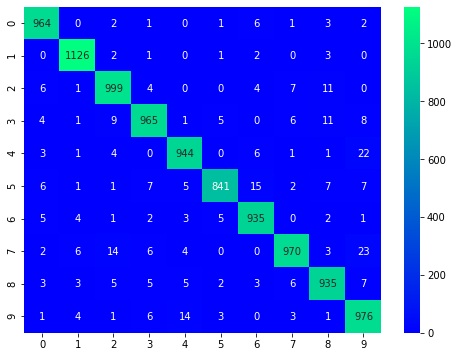

In [126]:
plt.figure(figsize = (8,6))
sns.heatmap(data = confusion_matrix, annot = True, fmt = 'd', cmap = 'winter')

Here we plotted the heatmap of confusion matrix to see the exact number of correct and incorrect predicted values. As we can see the diagonal numbers are showing the correctly predicted values and rest of the values show incorrectly predicted values. 